# Importar Librarias y datos

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [48]:
df = pd.read_parquet("output_08.parquet")

In [49]:
df.head()

,age,gender,employment_stat,wage_per_hour,working_week_per_year,occupation_code,total_employed,gains,losses,stocks_status,...,tax_status_Otro,tax_status_Single,citizenship_Native,citizenship_Otro,country_of_birth_own_US,migration_code_change_in_msa_MSA to MSA,migration_code_change_in_msa_Otro,migration_code_change_in_msa_unchanged,migration_code_change_in_reg_Otro,migration_code_change_in_reg_unchanged
0,0.853333,1.0,0.0,0.000000,1.000000,0.000000,0.333333,0.0,0.0,0.002916,...,True,False,True,False,True,False,False,False,False,False
1,0.666667,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
2,0.080000,0.0,0.0,0.050005,0.288462,0.565217,0.666667,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
4,0.733333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,False,True,False,True,False,False,False,False,False
5,0.400000,0.0,0.0,0.082508,1.000000,0.673913,1.000000,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,True,False,True


In [50]:
df.columns

Index(['age', 'gender', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'occupation_code', 'total_employed', 'gains',
       'losses', 'stocks_status', 'income_above_limit',
       'education_secondary_complete', 'education_secondary_incomplete',
       'education_technical_education/university_incomplete',
       'education_university_graduate_or_higher',
       'marital_status_Married-civilian spouse present',
       'marital_status_Never married', 'marital_status_Otro',
       'marital_status_Widowed', 'race_Otro', 'race_White', 'is_hispanic_Otro',
       'employment_commitment_Full-time schedules',
       'employment_commitment_Not in labor force',
       'employment_commitment_Otro',
       'industry_code_main_Manufacturing-durable goods',
       'industry_code_main_Not in universe or children',
       'industry_code_main_Otro', 'industry_code_main_Retail trade',
       'household_stat_Householder', 'household_stat_Nonfamily Householder',
       'household_stat

# Under Sampling

In [52]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [53]:
X = df.drop("income_above_limit", axis=1)
y = df["income_above_limit"]

X_resampled, y_resampled = RandomUnderSampler().fit_resample(X, y)

model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

importances = model.feature_importances_
feature_names = X.columns

sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
print(sorted_features)


[('age', 0.14389265947804988), ('occupation_code', 0.1374681987857211), ('stocks_status', 0.08822195374950521), ('working_week_per_year', 0.07971577747975007), ('total_employed', 0.07290899688293412), ('education_university_graduate_or_higher', 0.0666139740618412), ('gender', 0.05628502266421269), ('gains', 0.04641634439685129), ('household_stat_Householder', 0.019626618369628368), ('industry_code_main_Not in universe or children', 0.018461913460175984), ('losses', 0.0166961628592067), ('wage_per_hour', 0.01523467143383066), ('employment_stat', 0.014738397065833906), ('tax_status_Joint both under 65', 0.014737574536677189), ('education_secondary_complete', 0.01450689012075616), ('tax_status_Nonfiler', 0.014219622363929686), ('industry_code_main_Otro', 0.013941130903933173), ('education_secondary_incomplete', 0.012621398859548534), ('education_technical_education/university_incomplete', 0.010650139671230381), ('marital_status_Never married', 0.009542626581619185), ('race_White', 0.00900

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)  # Apply scaling


# Elegir las columnas

In [56]:
rfe = RFE(estimator=LogisticRegression(max_iter=500), n_features_to_select=7)
rfe.fit(X_resampled, y_resampled)

selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['age', 'working_week_per_year', 'occupation_code', 'gains', 'losses',
       'stocks_status', 'tax_status_Nonfiler'],
      dtype='object')


In [57]:
# tax status es un categorica y por eso voy a añadir los de mas y pais de nacimiento

In [58]:
selected = ['age', 'working_week_per_year', 'occupation_code', 'gains', 'losses',
       'stocks_status', 'tax_status_Joint both under 65', 'tax_status_Nonfiler',
       'tax_status_Otro', 'country_of_birth_own_US']

# Separar por el modelo

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled[selected], y_resampled, test_size=0.2, random_state=42)

# Probar con varios numeros de Clusters

In [62]:
# La precisión sigue aumentando. Aumente el alcance y la visualización.

accuracies = []

for K in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    #print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print(accuracies)

[0.7461538461538462, 0.7875, 0.7767307692307692, 0.7925, 0.79, 0.8015384615384615, 0.796923076923077, 0.7988461538461539]


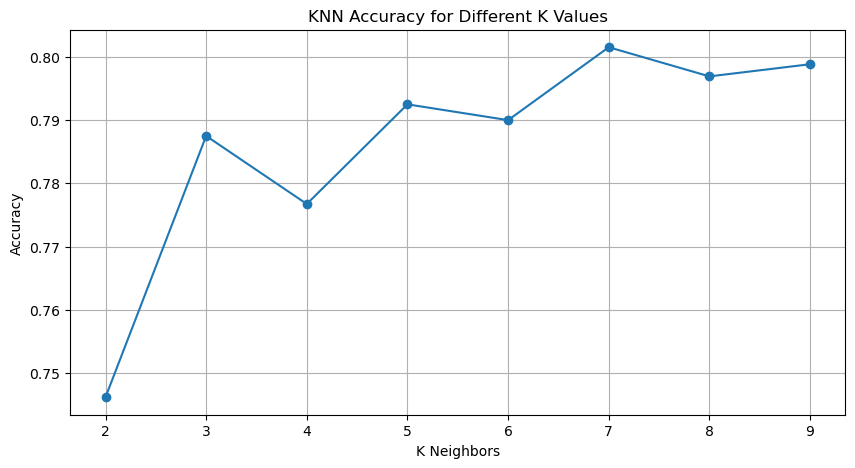

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), accuracies, marker='o', linestyle='-')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
#plt.xticks(k_values)
plt.grid(True)
plt.show()

# Elegir numero optimo de Clusters

### Mirando ese grafico **7** es que sale con lo mejor presicion

In [65]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {k}  Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

K value: 7  Accuracy: 0.8015


Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      2623
         1.0       0.79      0.81      0.80      2577

    accuracy                           0.80      5200
   macro avg       0.80      0.80      0.80      5200
weighted avg       0.80      0.80      0.80      5200



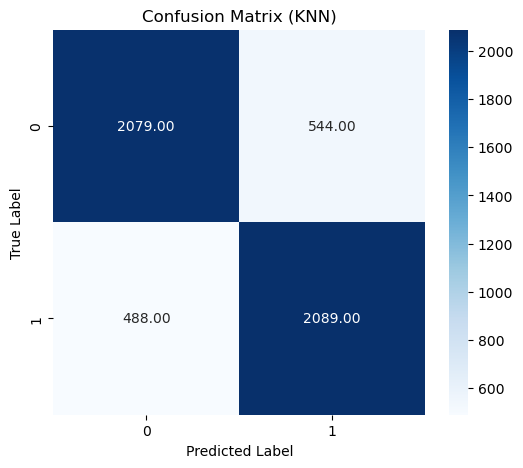

In [66]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True,  fmt='.2f', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [67]:
from evaluate_model import evaluate_model
from sklearn.metrics import roc_auc_score

y_probs = knn.predict_proba(X_test)[:, 1]  
roc_score = roc_auc_score(y_test, y_probs)

knn_metrics = evaluate_model("KNN oversample", y_test, y_pred, roc_score)

# Convert to DataFrame
knn_df = pd.DataFrame([knn_metrics])

knn_df.to_csv("knn_un.csv", index=False)

Accuracy: 0.8015
Precision (Class 0): 0.8099 | Precision (Class 1): 0.7934
Recall (Class 0): 0.7926 | Recall (Class 1): 0.8106
F1 Score (Class 0): 0.8012 | F1 Score (Class 1): 0.8019
Specificity: 0.7926
Negative Predictive Value (NPV): 0.8099
ROC score: 0.8672
--------------------------------------------------


# Elegir columanas con solver=Saga

In [69]:
rfe = RFE(estimator=LogisticRegression(solver='saga', max_iter=500), n_features_to_select=7)
rfe.fit(X_resampled, y_resampled)

selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['age', 'working_week_per_year', 'occupation_code', 'gains', 'losses',
       'stocks_status', 'tax_status_Nonfiler'],
      dtype='object')


household stat es un categorica y por eso voy a añadir los de mas y pais de nacimiento

In [71]:
selected = ['age', 'working_week_per_year', 'gains', 'losses', 'stocks_status',
       'migration_code_change_in_msa_MSA to MSA',
       'migration_code_change_in_reg_Otro', 'country_of_birth_own_US']

# Separar por el modelo

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled[selected], y_resampled, test_size=0.2, random_state=42)

# Probar con varios numeros de Clusters

In [75]:
# La precisión sigue aumentando. Aumente el alcance y la visualización.

accuracies = []

for K in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    #print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print(accuracies)

[0.6984615384615385, 0.7284615384615385, 0.7226923076923077, 0.7401923076923077, 0.7388461538461538, 0.7419230769230769, 0.7365384615384616, 0.7478846153846154, 0.7436538461538461, 0.7461538461538462, 0.7459615384615385, 0.7471153846153846, 0.745]


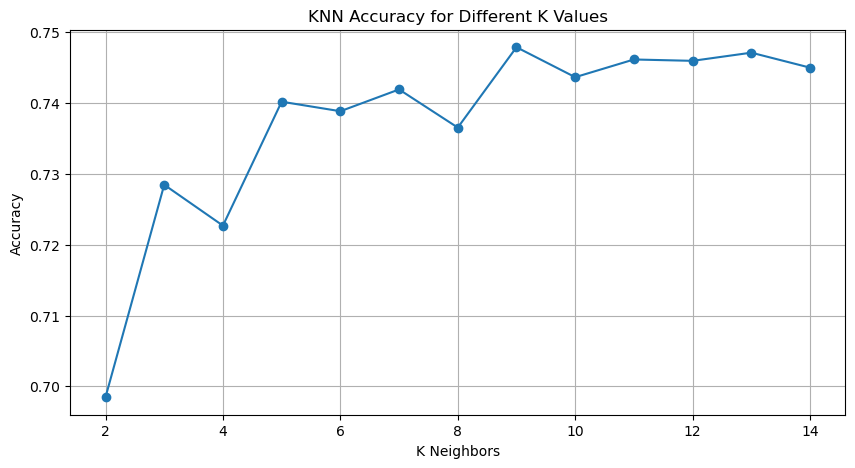

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), accuracies, marker='o', linestyle='-')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
#plt.xticks(k_values)
plt.grid(True)
plt.show()

# Elegir numero optimo de Clusters

### Mirando ese grafico **7** es que sale con lo mejor presicion

In [78]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {k}  Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

K value: 7  Accuracy: 0.7419


Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      2623
         1.0       0.73      0.75      0.74      2577

    accuracy                           0.74      5200
   macro avg       0.74      0.74      0.74      5200
weighted avg       0.74      0.74      0.74      5200



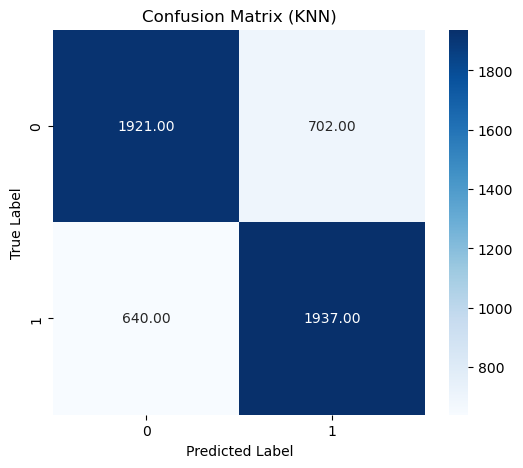

In [79]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True,  fmt='.2f', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [80]:
from evaluate_model import evaluate_model
from sklearn.metrics import roc_auc_score

y_probs = knn.predict_proba(X_test)[:, 1]  
roc_score = roc_auc_score(y_test, y_probs)

knn_metrics = evaluate_model("KNN oversample saga", y_test, y_pred, roc_score)

# Convert to DataFrame
knn_df = pd.DataFrame([knn_metrics])

knn_df.to_csv("knn_un_saga.csv", index=False)

Accuracy: 0.7419
Precision (Class 0): 0.7501 | Precision (Class 1): 0.7340
Recall (Class 0): 0.7324 | Recall (Class 1): 0.7516
F1 Score (Class 0): 0.7411 | F1 Score (Class 1): 0.7427
Specificity: 0.7324
Negative Predictive Value (NPV): 0.7501
ROC score: 0.8344
--------------------------------------------------
